In [1]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.tree import export_graphviz
import pydot
from matplotlib import pyplot as plt
import joblib
import pandas as pd
import numpy as np
import graphviz
from sklearn.metrics import RocCurveDisplay
import scipy
from sklearn.inspection import PartialDependenceDisplay

In [2]:
def creating_features_labels(file):#reading in data and splitting variables from labels
    features = pd.read_csv(file).iloc[:,2:]

    #identify the labels, i.e. the value to predict and remove it from the total cases
    # features = features [features["TOTAL_CASES" ] != 0] 
    labels = np.array(features["RISK"])
    # print("features")
    # pprint(features.describe())
    features = features.drop(['TOTAL_CASES', 'SUITABILITY_MEDIAN', 'CASES_DENSITY', 'RISK'], axis = 1)


    # Saving feature names for later use
    feature_list = list(features.columns)
    # print(feature_list)
    # print("labels")
    # print(labels)

    #convert to numpy array
    features = np.array(features)

    return labels, features, feature_list

In [3]:
#assess the efficacy of the hyperparameter search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mae = np.mean(errors) #couldnt use mape as have zero values for many data points
    print('Model Performance')
    print('Average Error: {:0.4f} cases.'.format(mae))
    
    return mae

In [39]:
# measuring importance of different factors
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: POP_DENS             Importance: 0.34
Variable: SUITABILITY_MEAN     Importance: 0.34
Variable: SVI                  Importance: 0.32


Text(0.5, 1.0, 'Variable Importances')

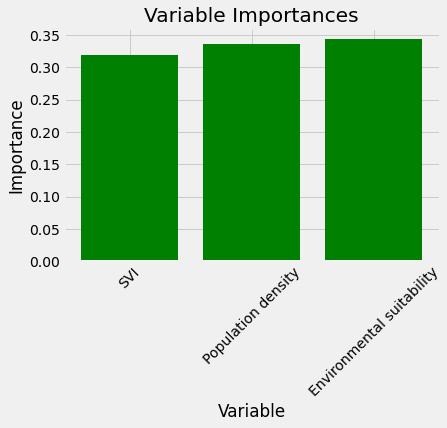

In [40]:

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'green')

# Tick labels for x axis
plt.xticks(x_values, ['SVI', 'Population density', 'Environmental suitability'], rotation='45')


# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

['SVI', 'POP_DENS', 'SUITABILITY_MEAN']


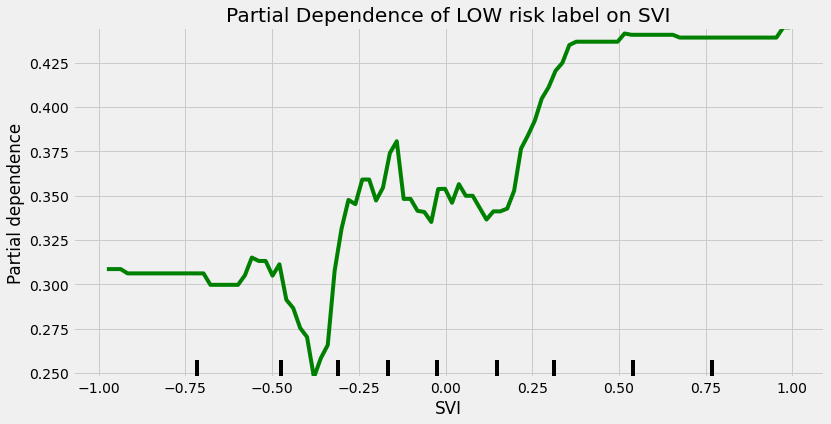

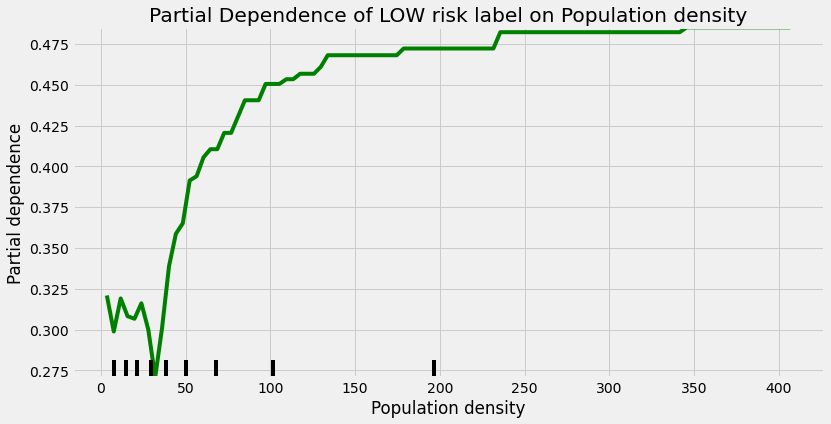

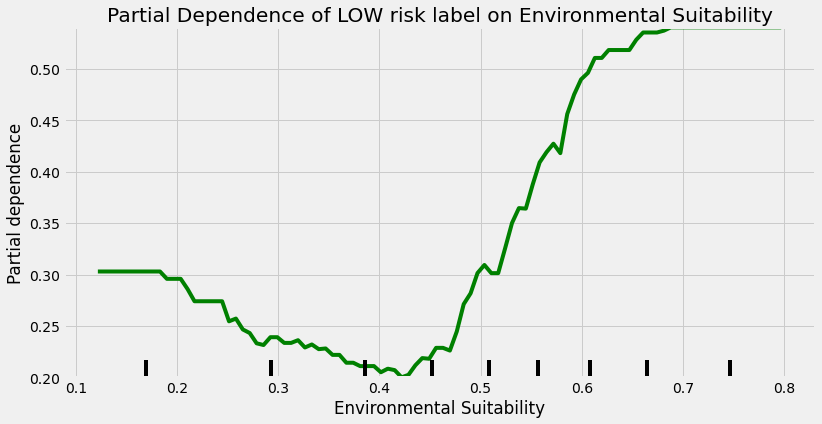

In [70]:
#getting partial dependence plots
print(feature_list)
list = ["SVI", "Population density", "Environmental Suitability"]

for i in ['LOW']:
    k=0
    for j in feature_list:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_title("Partial Dependence of " + i + " risk label on " + list[k])
        plot = PartialDependenceDisplay.from_estimator(rf, features, [j],feature_names = feature_list, target = i, line_kw={"color": "green"}, ax = ax)
        plot.axes_[0][0].set_xlabel(list[k])
        # plt.savefig("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/write_up/figures/" + i + "_" + j + ".png", bbox_inches='tight')
        k+=1


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron", "color": "red"}
)
ax1.legend()
ax2.legend()